# Medical Cost Personal Insurance Project

### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

### Columns 

age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance
Predict : Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


After looking at the dataset we got to know that charges is our target variable and all the other columns are independent variables here.It is a regression type model.

In [3]:
df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(50)

,age,sex,bmi,children,smoker,region,charges
1288,20,male,39.400,2,yes,southwest,38344.56600
1289,44,male,34.320,1,no,southeast,7147.47280
1290,38,female,19.950,2,no,northeast,7133.90250
1291,19,male,34.900,0,yes,southwest,34828.65400
1292,21,male,23.210,0,no,southeast,1515.34490
1293,46,male,25.745,3,no,northwest,9301.89355
1294,58,male,25.175,0,no,northeast,11931.12525
1295,20,male,22.000,1,no,southwest,1964.78000
1296,18,male,26.125,0,no,northeast,1708.92575
1297,28,female,26.510,2,no,southeast,4340.44090


# Exploratory Data Analysis

In [5]:
df.shape

(1338, 7)

In this dataset there are 1338 rows and 7 columns.

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# checking the dataset of the columns
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
# checking the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can clearly mention that there aare no null values present in this dataset.

In [10]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have observed that there are 3 types of datatypes present in this dataset mainly int64,object and float 64

<Axes: >

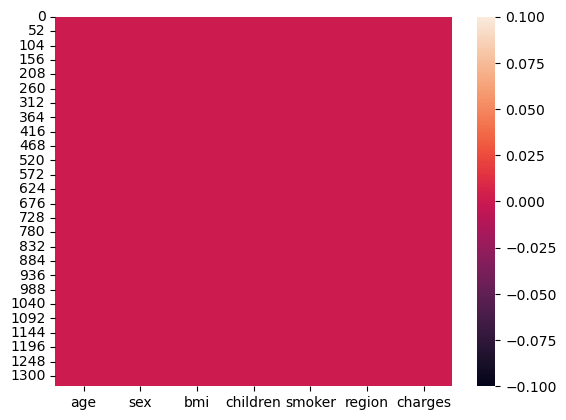

In [11]:
sns.heatmap(df.isnull())

This heat map indicates that there are no null values present in this dataset.

# Description of the dataset 

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here we have noted following observation :-
1 It givesus the information about the categorical data.
2 The mean in all the columns is greater than the median(50%) so all the columns here are rightly skewed.
3 there is not much differnce between the 75%  and the max values of all the columns

In [13]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


This gives the information of actegorical columns.
the top region is the southeast region and the highest number in the sex column is of male which has 676 freuency

# Data Visualization

<Axes: xlabel='charges', ylabel='Density'>

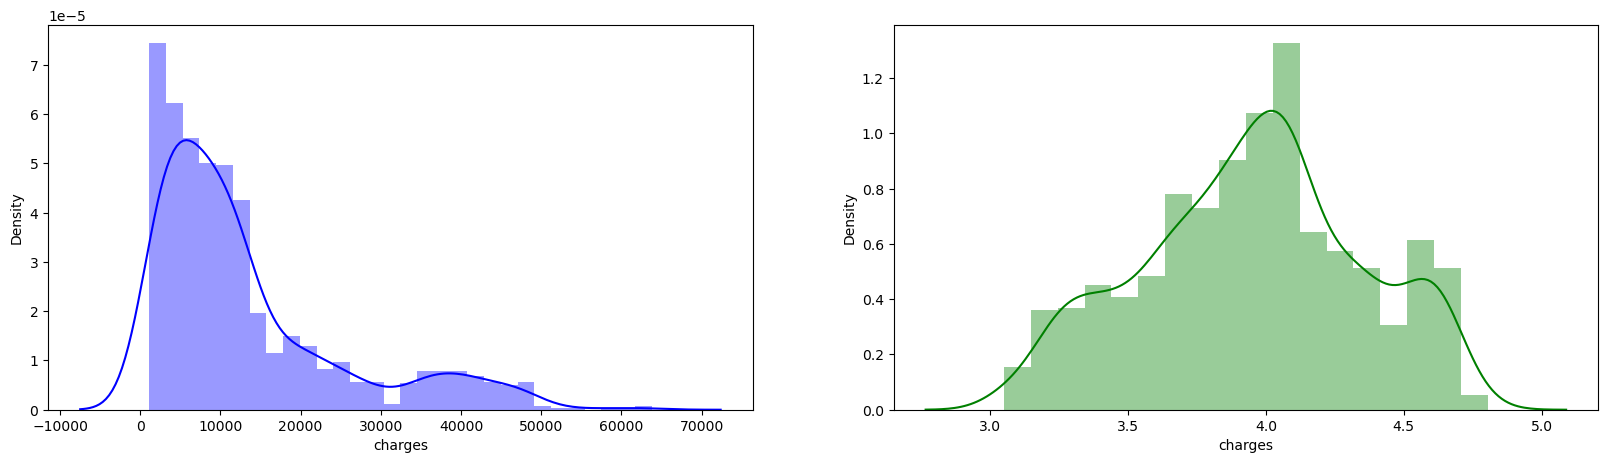

In [14]:
# distribution of the charges
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges,color='b')

# natural log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges),color='g')

The distribution of the charges is rightly skewed, so we applied natural log for ~distribution.

Text(0.5, 1.0, 'Distribution of BMI')

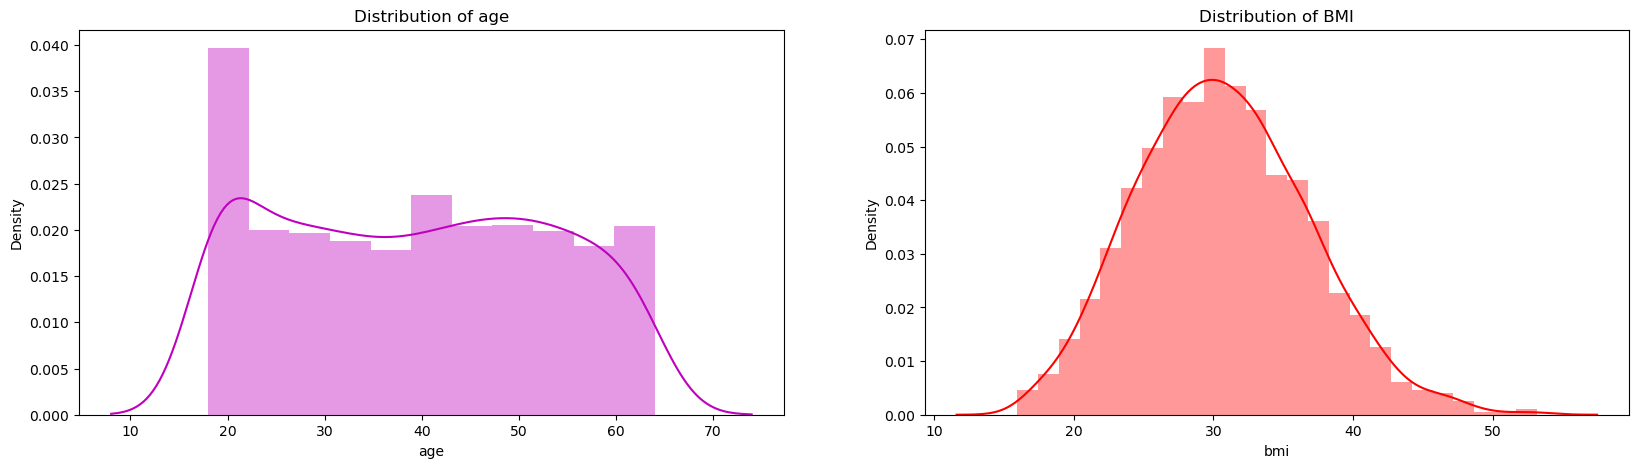

In [15]:
# visualizing distribution for numerical variable vs medical charge
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.age,color='m').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi,color='r').set_title('Distribution of BMI')

This indicates the relation betwwen the age vs density and relation of bmi vs density

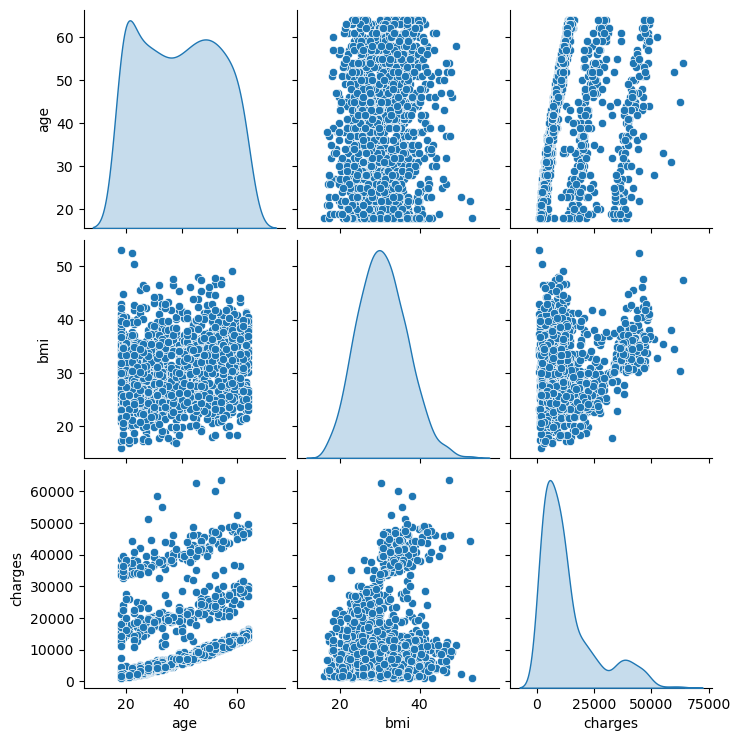

In [16]:
# pairplot for age,BMI,charges
df_num=df[['age','bmi','charges']]
sns.pairplot(df_num,diag_kind='kde')
plt.show()

This pairplot indicates that there is a linear relation between age bmi with charges.

### visualizing categorical variables individually vs medical charges 

<Axes: xlabel='smoker', ylabel='charges'>

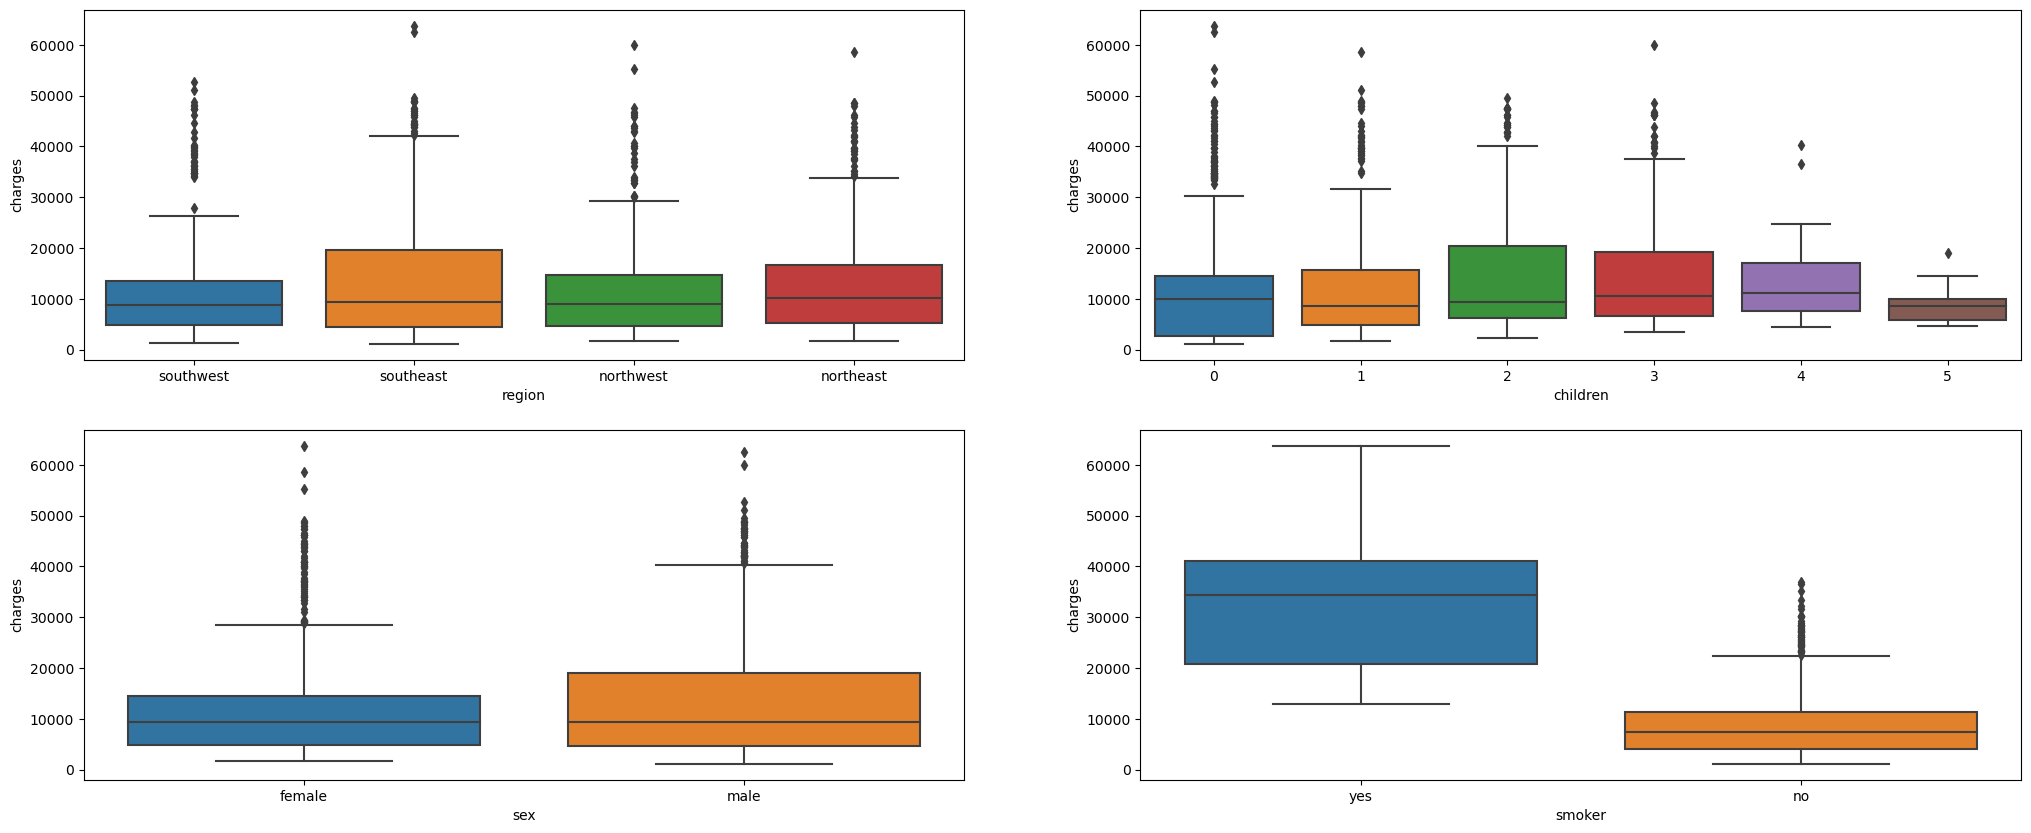

In [17]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='region',y='charges',data=df)

plt.subplot(2,2,2)
sns.boxplot(x='children',y='charges',data=df)

plt.subplot(2,2,3)
sns.boxplot(x='sex',y='charges',data=df)

plt.subplot(2,2,4)
sns.boxplot(x='smoker',y='charges',data=df)


Based on the box plots above, we can derive some inferences on the categorical variables:

Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.
Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.
Gender: The data is a little bit biased towards males as the interquartile range for male is higher compare to that for female. The data representation for male to female is 50.5 to 49.5.
Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, in comparison to those that do not smoke.
Now that we have looked at the effect of individual variables on medical charges, let's look at effect of a combination of factors on medical charges.

### Bi Variate Analysis 

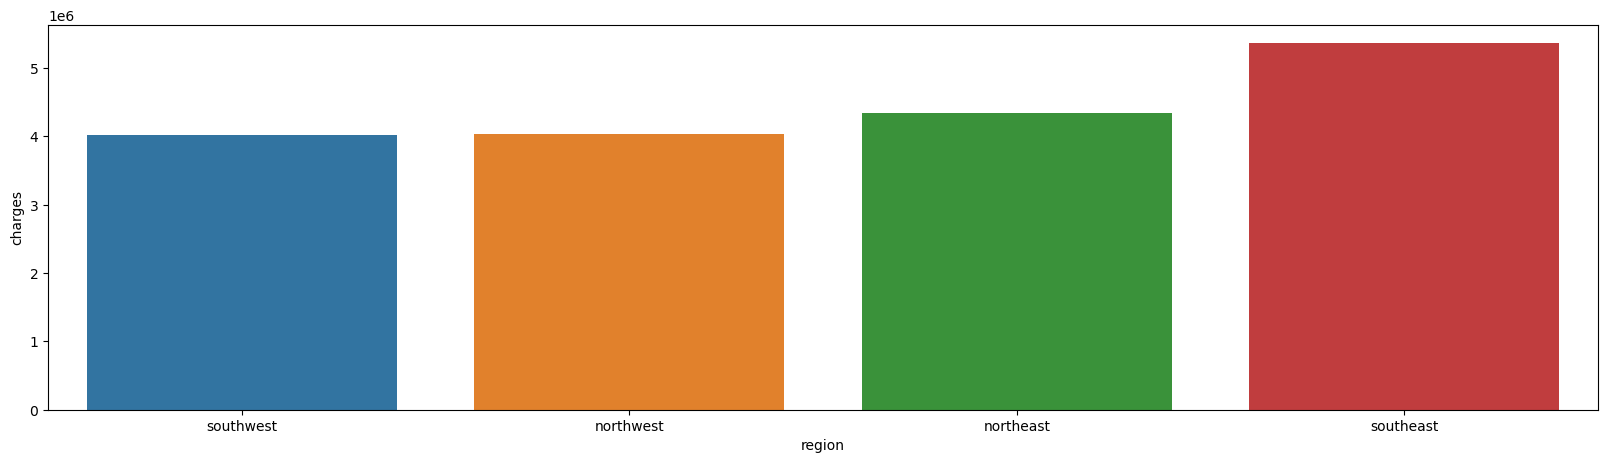

In [18]:
# Charges by region
charges=df['charges'].groupby(df.region).sum().sort_values(ascending=True)
plt.figure(figsize=(20,5))
ax=sns.barplot(x=charges.index,y=charges)

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.

### charges by region and number of children 

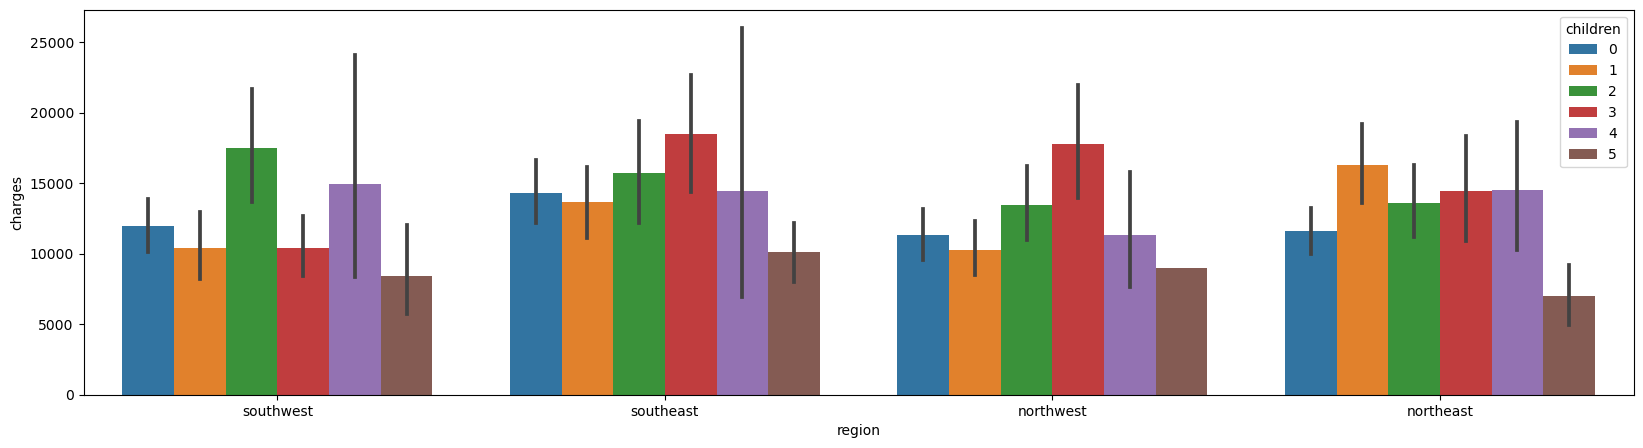

In [19]:
# setting children as the hue parameter
plt.figure(figsize=(20,5))
ax=sns.barplot(x='region',y='charges',hue='children',data=df)

It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.

### Charges by region and gender

<Axes: xlabel='region', ylabel='charges'>

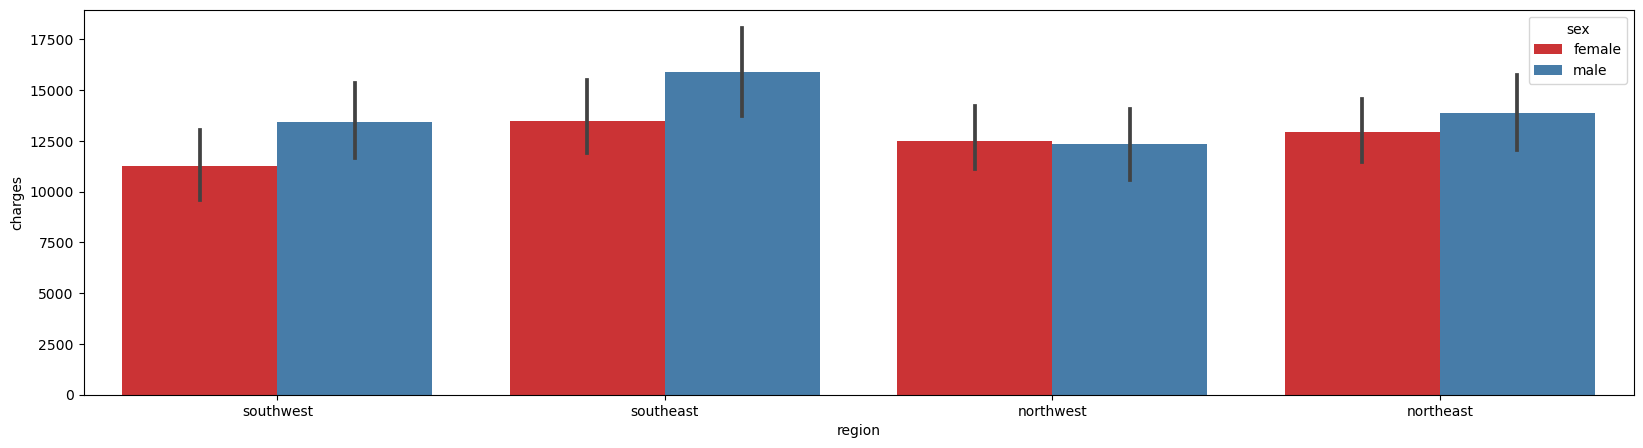

In [20]:
# setting sex as hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x='region',y='charges',hue='sex',data=df,palette='Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges

### Charges by region and smoking behaviour 

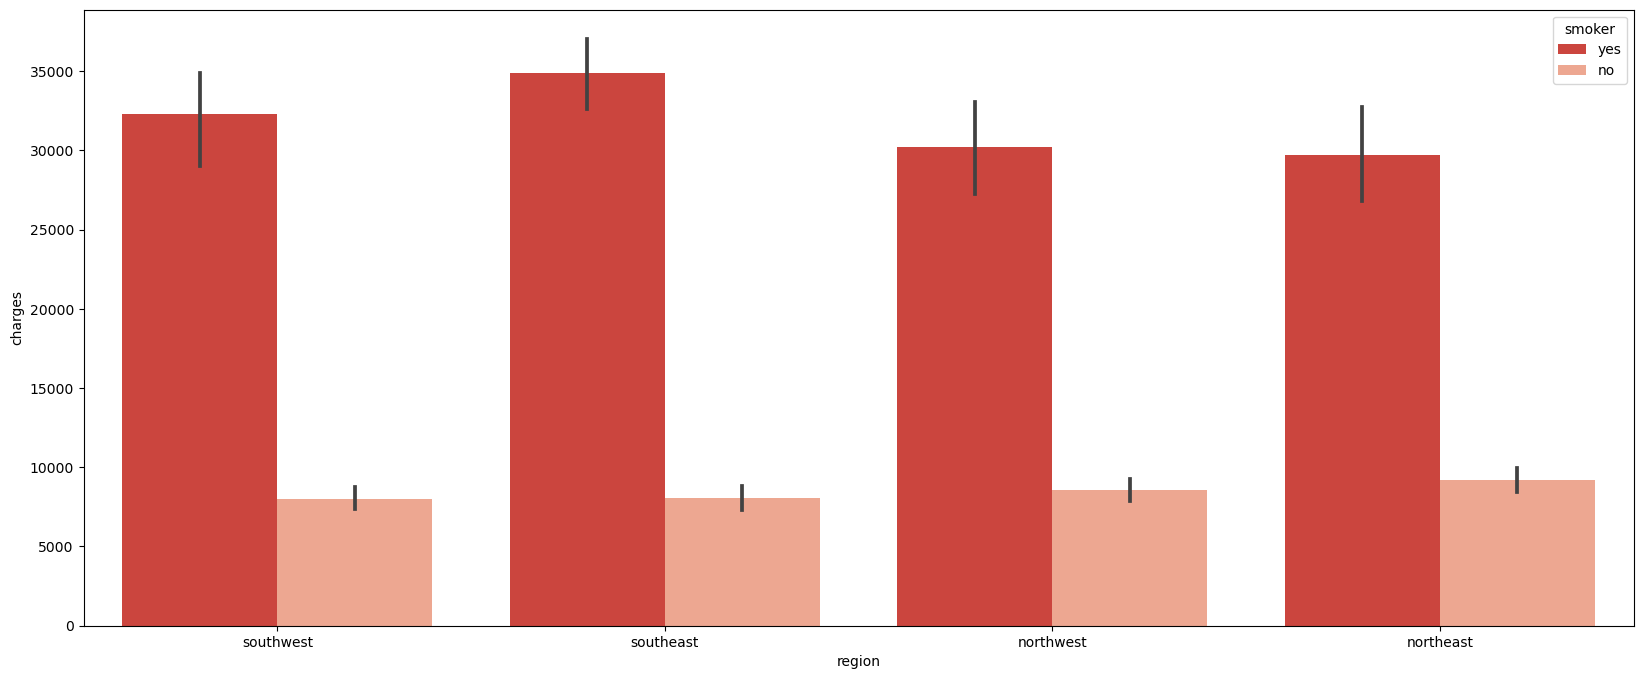

In [21]:
f,ax=plt.subplots(1,1,figsize=(20,8))
ax=sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

From these bar charts, we can see that smoking behavior by region significantly affected medical charges.

### charges by age,bmi and children based on smoking behaviour 

Text(0.5, 1.0, 'No of children vs Medical Charges')

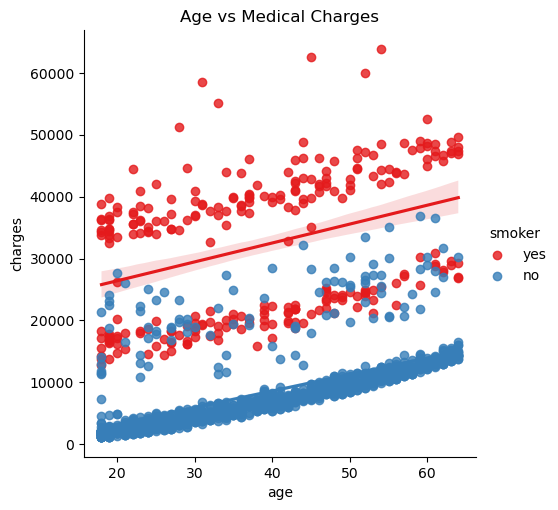

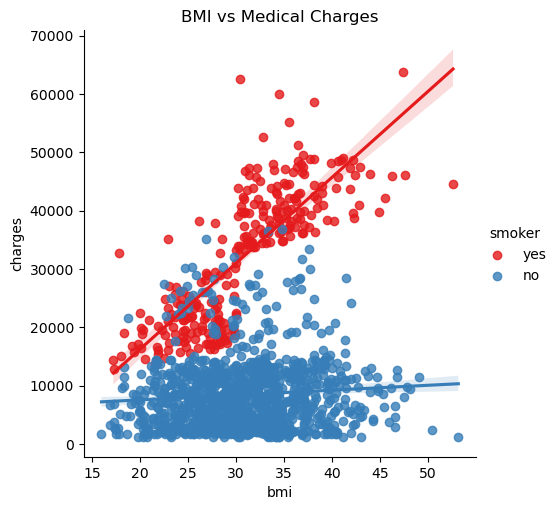

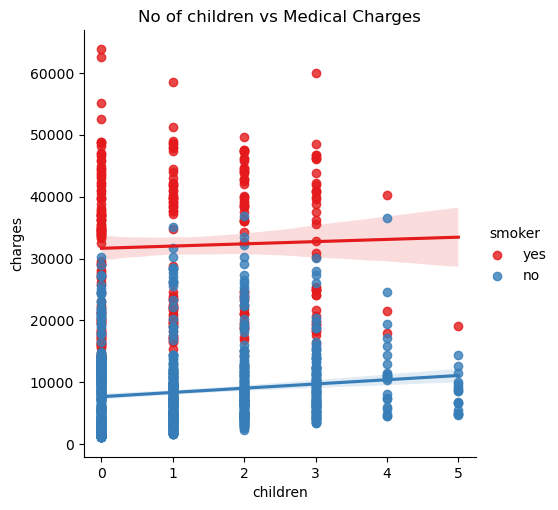

In [22]:
ax=sns.lmplot(x='age',y='charges',data=df,hue='smoker',palette='Set1')
plt.title('Age vs Medical Charges')

ax=sns.lmplot(x='bmi',y='charges',data=df,hue='smoker',palette='Set1')
plt.title('BMI vs Medical Charges')

ax=sns.lmplot(x='children',y='charges',data=df,hue='smoker',palette='Set1')
plt.title('No of children vs Medical Charges')

Based on the analysis,

We know that smoking has a great impact on medical costs. Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

### Data Correlation

In [23]:
# converting data into categorical type
df[['region','sex','smoker']]=df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [24]:
# converting data into numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
label.fit(df.region.drop_duplicates())
df.region=label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex=label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker=label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


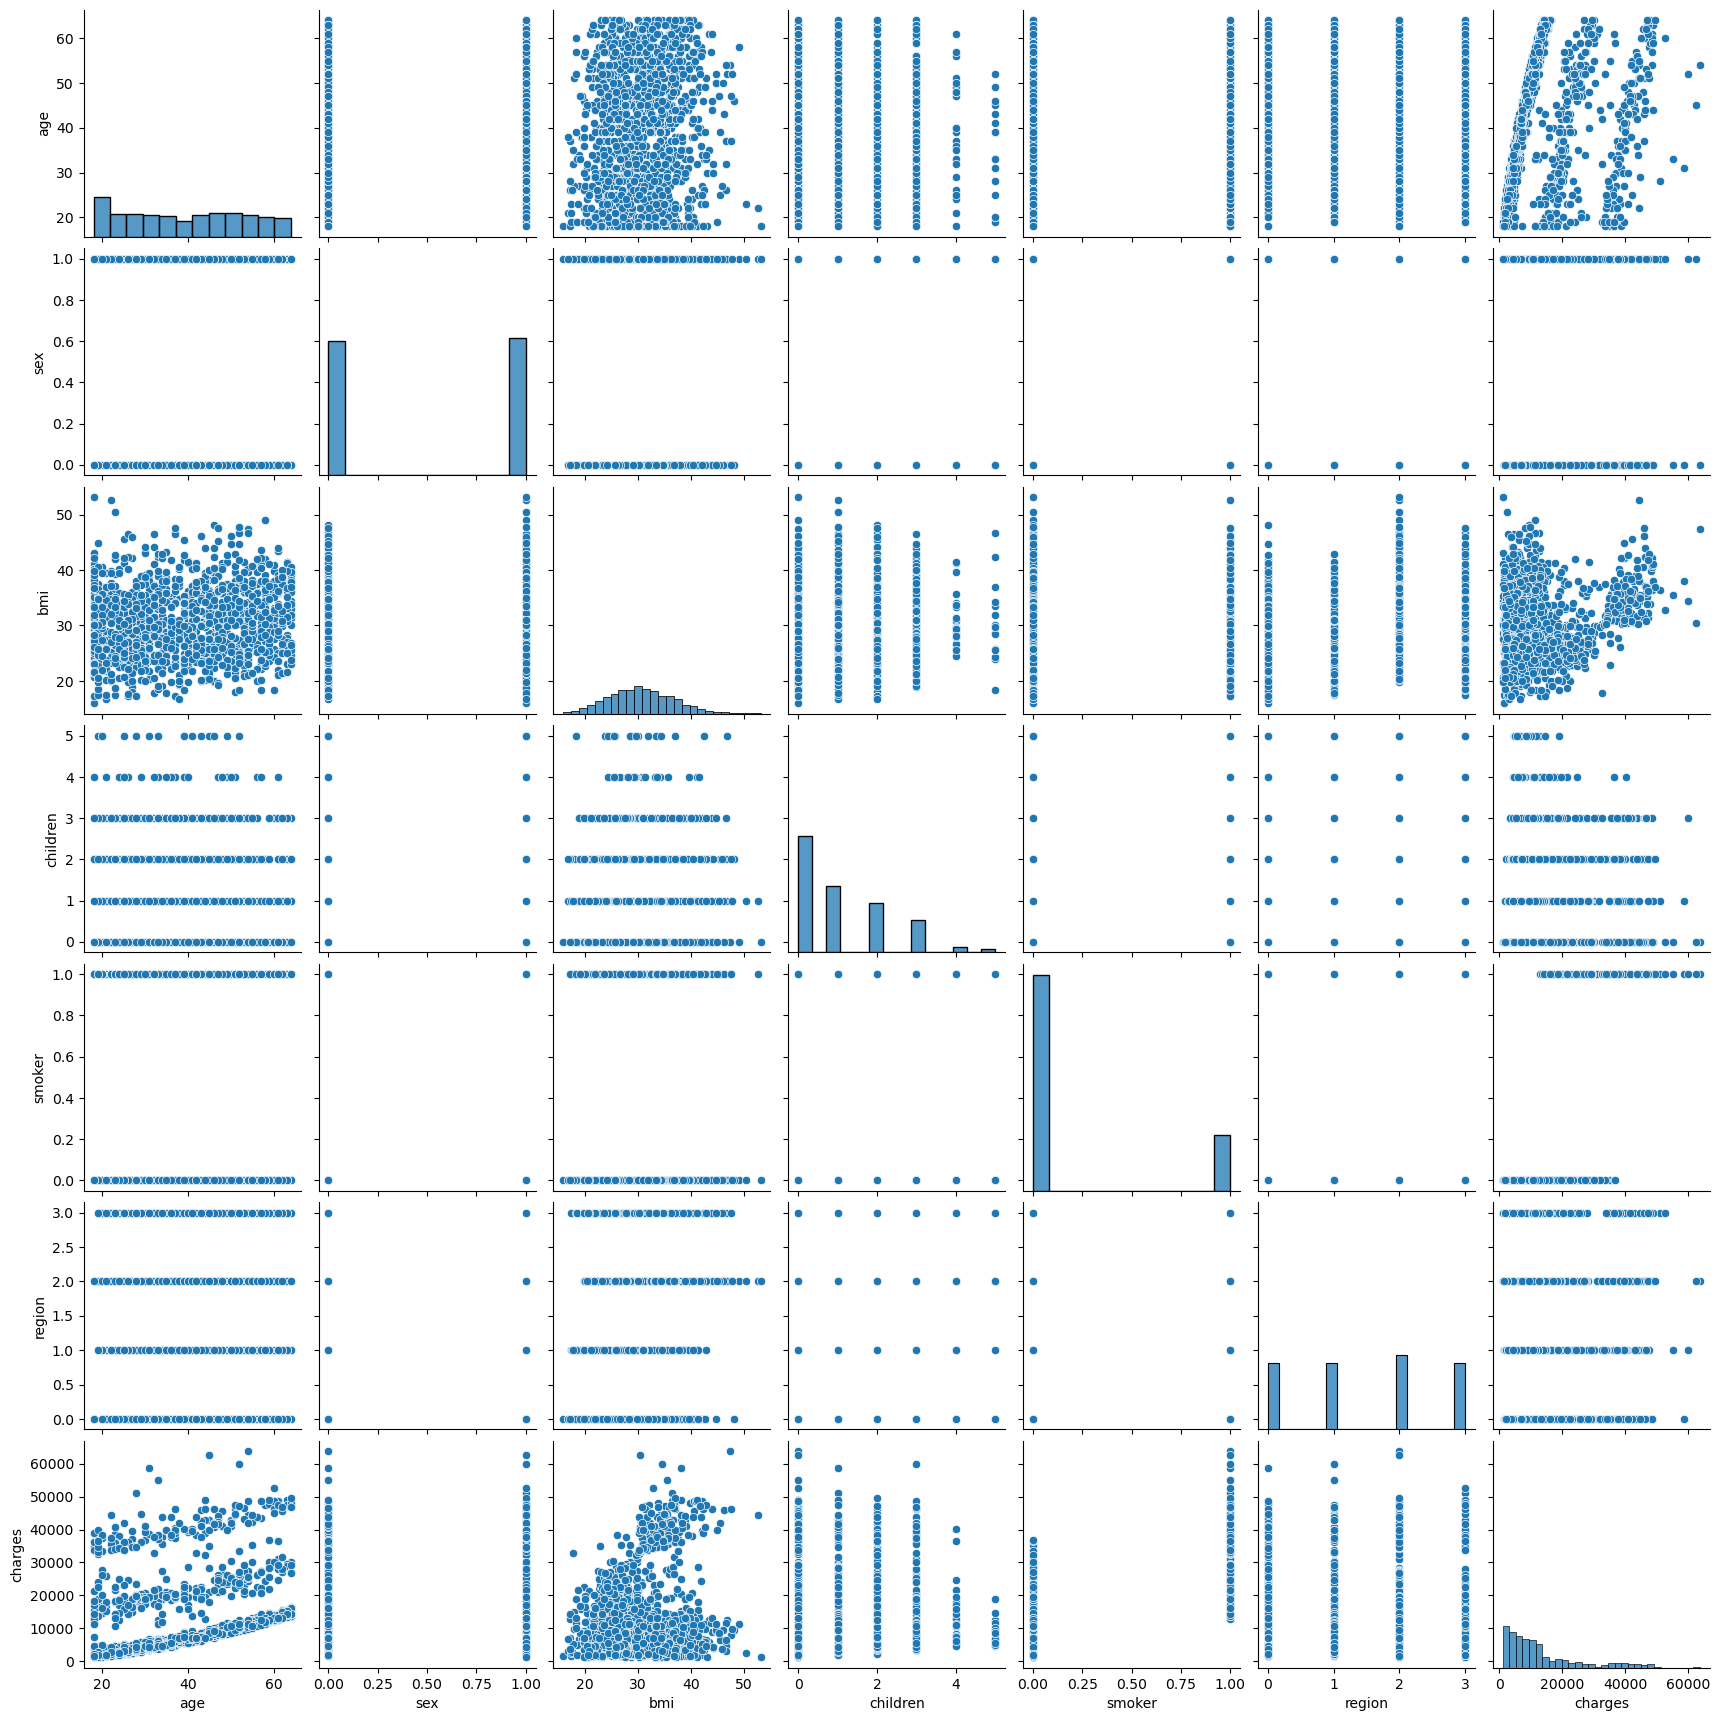

In [26]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

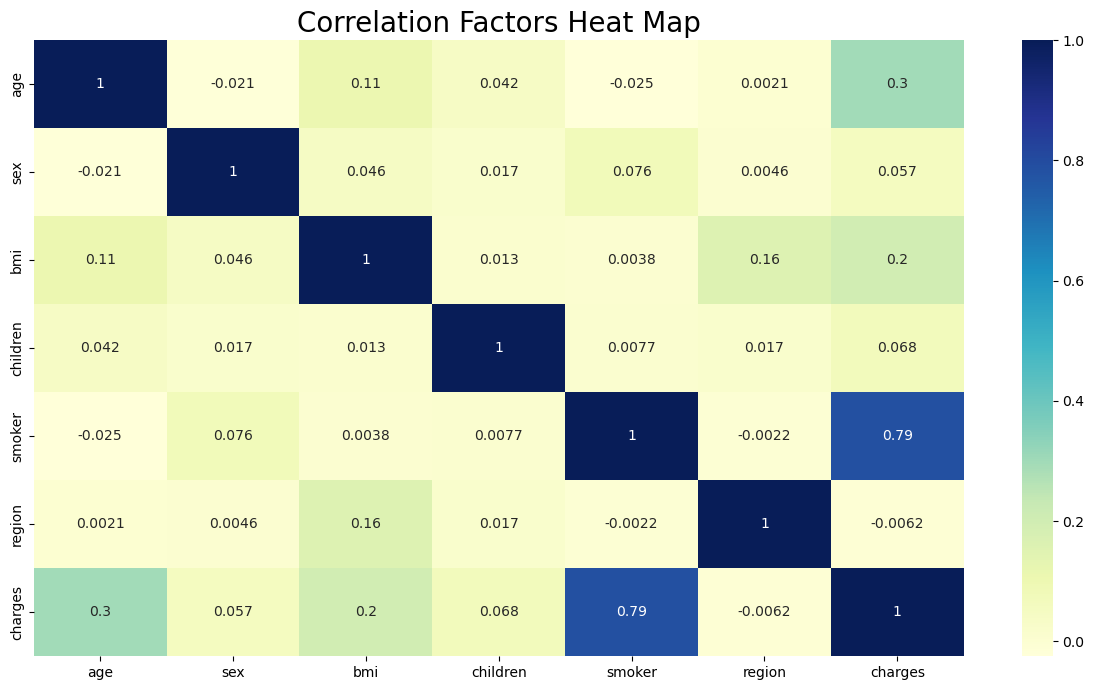

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu').set_title('Correlation Factors Heat Map',size='20')

The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

# Preparing data for machine learning

In [28]:
X=df.drop('charges',axis=1)
y=df['charges']

### train test split 

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Model Building

### Linear Regression 

In [31]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7998747145449959
MAE 3930.3332739011394


### Best fit line 

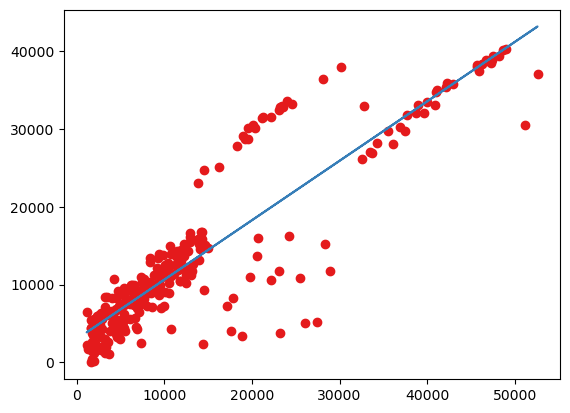

In [32]:
palette="Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b=np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()

# Ridge Regression

In [33]:
R=Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred=R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7949230220730673
MAE 4061.9476782587276


# Lasso Regression

In [34]:
L=Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred=L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7998746860842456
MAE 3930.3340020031997


# Decision Tree Regressor

In [35]:
DT=DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2_score 0.882017038339453
MAE 2666.4693543548537


# Random Forest Regressor

In [36]:
RF=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.75,max_features=0.75,max_depth=15)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8967887902288204
MAE 2432.3039381068897


# Extra Tree Regressor

In [37]:
ET=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
ET.fit(X_train,y_train)
y_pred=ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8959735265960234
MAE 2567.8571312897984


# ADA Boost Regressor

In [38]:
AB=AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred=AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8633285668156895
MAE 3909.683731958971


# Gradient Boosting Regressor

In [39]:
GB=GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred=GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.898188479843152
MAE 2435.1374185213695


# XGB Regressor

In [40]:
!pip install xgboost
from xgboost import XGBRegressor

In [41]:
XG = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.1)
XG.fit(X_train,y_train)
y_pred = XG.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.905247861861851
MAE 2376.1056919254897


based on both the R2 score and MAE, the XGBoost model is considered the best model among the ones listed.

# Feature Importance

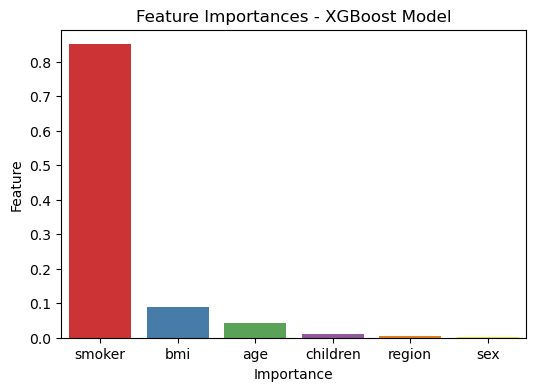

In [46]:
# Train the XGBoost model (I have already trained and named it 'XG')
XG.fit(X_train, y_train)

# Get feature importances
importances = XG.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to hold feature importance data
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual.

# Saving model

In [43]:
import pickle
filename = 'XGBRegressor.pkl'
pickle.dump(XG, open(filename, 'wb'))

At last we have saved our model.